### WeatherPy

Data Viz Boot Camp | Python-API Homework

Due Tuesday, January 7, 2020


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lngs)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.


In [ ]:
appid = api_key
base_url = "api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key
record = 1
set_num = 1
cityinfo = []

print("Beginning Data Retrieval")
print("-----------------------------")

for cityname in cities:
    #print(cityname)
    #base_url = "http://api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key+"&q="+cityname
    #print(base_url)

    if record >50:
        record = 1
        set_num = set_num+1
# Include a print log of each city as it'sbeing processed (with the city number and city name).
    base_url = "http://api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key+"&q="+cityname  
    weather_response = requests.get(base_url)
    weather_json = weather_response.json()
    #print (weather_response)
    #print("Processing Record "+str(record)+ " of Set " + str(set_num) + " | " +str(cityname))
    record = record+1
     print(weather_json)
    if weather_json["cod"]== "200":
        cityinfo.append(weather_json)
       
        

### Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [ ]:
#print(cityinfo)
citytable = []

for citydata in cityinfo:
    citytable.append({"City": citydata["name"],"Cloudiness": citydata["clouds"]["all"],
                      "Country": citydata["sys"]["country"],"Date": citydata["dt"],
                      "Humidity": citydata["main"]["humidity"],"Lat": citydata["coord"]["lat"],
                      "Lng": citydata["coord"]["lon"],"Max Temp": citydata["main"]["temp_max"],
                      "Wind Speed": citydata["wind"]["speed"]})
      
#city_df
#citytable

In [ ]:
city_df = pd.DataFrame(citytable)
city_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"],city_df["Max Temp"],color="purple")

plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_temp.png")
# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

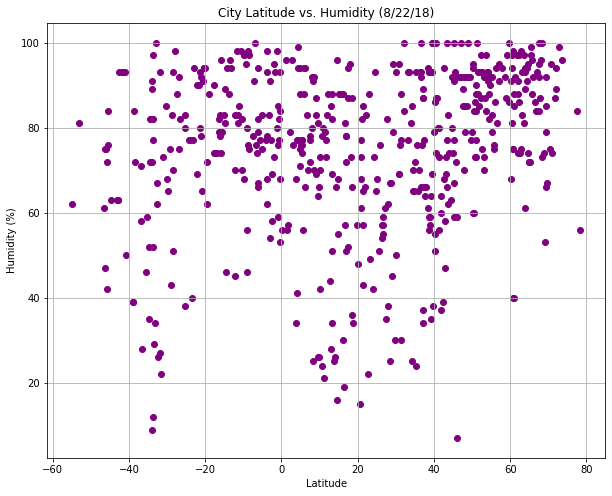

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Humidity"],color="purple")


plt.title("City Latitude vs. Humidity (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_humidity.png")
# Show the Figure
plt.show()



#### Latitude vs. Cloudiness Plot

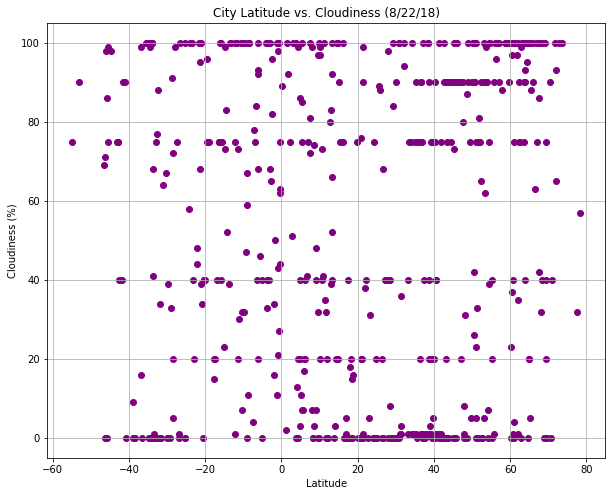

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Cloudiness"],color="purple")

plt.title("City Latitude vs. Cloudiness (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_clouds.png")
# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

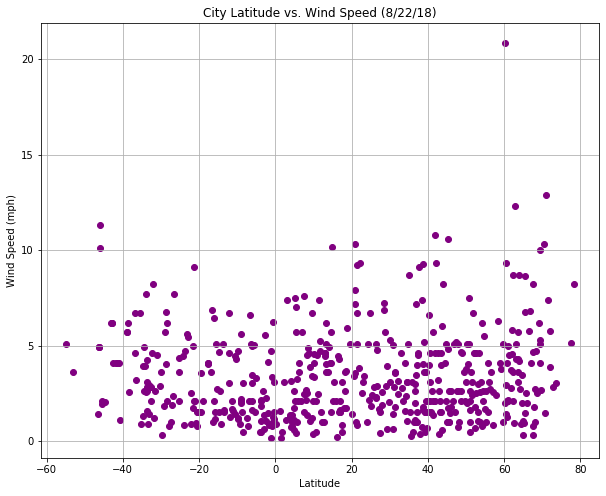

In [110]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Wind Speed"],color="purple")

plt.title("City Latitude vs. Wind Speed (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_wind.png")
# Show the Figure
plt.show()